There were 7 seasons when Chicago Cubs have hit at least 200 home runs
The median number of wins in those seasons was 84.0
The presidential term with the most home runs was 57


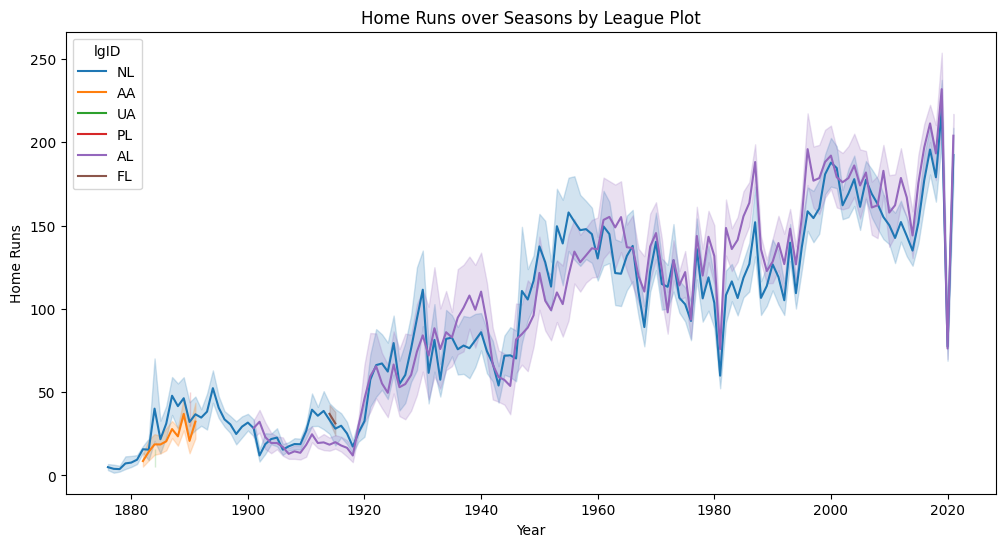

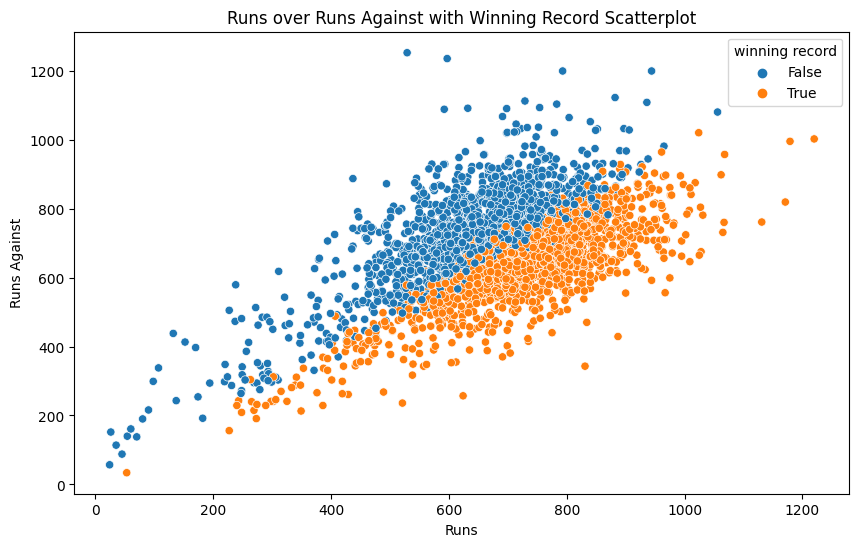

In [12]:
# Question 1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Imports Teams dataset
teams = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Teams.csv")

# Part a)

# Narrows down the data for two tousands
twotousands = teams[(teams ['yearID'] >= 2000) & (teams['yearID'] <= 2009) ][['yearID','W','L']]

# Part b)

# Finds the number of years Cubs hit at least 200 HRs in a season and the median number of wins in those seasons.
cubs_hr_wins = teams[(teams['teamID'] == 'CHN') & (teams['HR'] >= 200)]
nyears = len(cubs_hr_wins)
cubs_median_wins = cubs_hr_wins['W'].median()

print(f"There were {nyears} seasons when Chicago Cubs have hit at least 200 home runs")
print(f"The median number of wins in those seasons was {cubs_median_wins}")

# Part c)

teams['election'] = (teams['yearID'] - 1788) // 4
most_hr_term = teams.groupby('election')['HR'].sum().idxmax()
print(f"The presidential term with the most home runs was {most_hr_term}")

# Part d)

# Remove missing observations
teams_cleared = teams.dropna(subset = ['lgID'])

# Plot home runs over seasons
plt.figure(figsize=(12,6))
sns.lineplot(x = 'yearID', y = 'HR', hue = 'lgID', data = teams_cleared)
plt.xlabel("Year")
plt.ylabel("Home Runs")
plt.title("Home Runs over Seasons by League Plot")
plt.show()

# Part e)

# Create variable "winning record"
teams['winning record'] = teams['W'] > teams['L']
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'R', y = 'RA', hue = 'winning record', data= teams)
plt.xlabel("Runs")
plt.ylabel("Runs Against")
plt.title("Runs over Runs Against with Winning Record Scatterplot")
plt.show()





boro
BRONX            0.351805
BROOKLYN         0.329875
MANHATTAN        0.342472
Missing          0.452055
QUEENS           0.328954
STATEN ISLAND    0.362419
Name: grade, dtype: float64
dba with the lowest average score is STARBUCKS with the value 11.664353859496964


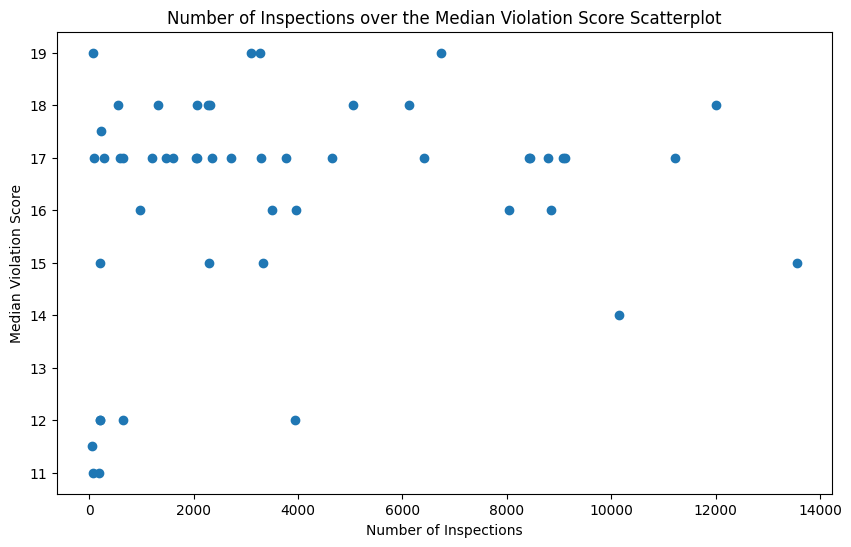

Based on the scatter plot one can reasonably assume that the median violation score rises steadily as more inspections are done.


In [11]:
# Question 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Teams dataset
violations = pd.read_csv("https://raw.githubusercontent.com/gjm112/DSCI401/main/data/Violations.csv")

# Part a)

# Calculates the proportion of inspections in each boron with a grade A
inspecs_over_A_borons = violations.groupby('boro')['grade'].apply(lambda x: (x == 'A').mean()).fillna(0)

# Shows the proportion
print(inspecs_over_A_borons)

# Part b)

# Find and show the top 10 dba's with most inspection
ten_most_dna = violations['dba'].value_counts().head(10).index

# Compute and show the average score for each dba's in top 10 dba's with most inspections
avg_ten_most_dna = violations[violations['dba'].isin(ten_most_dna)].groupby('dba')['score'].mean().sort_values()
lwst_avg_scr_dba = avg_ten_most_dna.idxmin()
lwst_avg_scr = avg_ten_most_dna.min()
print(f"dba with the lowest average score is {lwst_avg_scr_dba} with the value {lwst_avg_scr}")

# Part c)

# Filters data for Manhattan's zip codes
manhattan_zips = violations[violations['boro'] == 'MANHATTAN']
count_zips = manhattan_zips['zipcode'].value_counts()

# Finds zip codes in Manhattan with 50 or more inspections
zips_over_50 = count_zips[count_zips >= 50].index

# Calculates the median score for each of the zips over 50 inspections
med_zip_scr = manhattan_zips[manhattan_zips['zipcode'].isin(zips_over_50)].groupby('zipcode')['score'].median()

# Plots the relationship between the number of inspections and median score
plt.figure(figsize = (10,6))
plt.scatter(count_zips[zips_over_50], med_zip_scr)
plt.xlabel("Number of Inspections")
plt.ylabel("Median Violation Score")
plt.title("Number of Inspections over the Median Violation Score Scatterplot")
plt.show()

print("Based on the scatter plot one can reasonably assume that the median violation score rises steadily as more inspections are done.")
